# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> The current notebook contains 9 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl #done to adjust background of plots in the next cell

from pandas_datareader import data as pdr
import yfinance as yf
#extraction source 1, used in lesson 3 and 4

import datetime as dt

import pandas_datareader.data as web
#extraction source 2, used in lesson 2

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3) 

plt.style.use("ggplot")
#some alternatives include: "seaborn-white"

mpl.rcParams["axes.grid"] = True     #adding grids to background
mpl.rcParams["grid.color"] = "grey"  #gridlines are grey
mpl.rcParams["grid.alpha"] = 0.25    #control intensity of gridlines, the lower the more faint they are

mpl.rcParams["axes.facecolor"] = "white" #makes your entire plot background and legend white, if change to yellow, will be yellow

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [3]:
# extract the historical stock data of stock of Walmart and stock of IBM
WMT_df = pdr.get_data_yahoo("WMT", 
                            start = dt.datetime(2014, 10, 13), 
                            end = dt.datetime(2022, 9, 13))["Adj Close"]
IBM_df = pdr.get_data_yahoo("IBM", 
                  start = dt.datetime(2014, 10, 13), 
                  end = dt.datetime(2022, 9, 13))['Adj Close']

# Method 1 #vanilla, non-dynamic way

In [4]:
# combine the historical stock data into one dataframe
frame = [IBM_df, WMT_df] #list of dataframes otherwise you cant contenate two DFs without first turning them into a list 
stock_df = pd.concat(frame, axis = 1, keys = ["IBM", "WMT"])


In [5]:
stock_df

,IBM,WMT
Date,,
2014-10-13,124.599350,65.120056
2014-10-14,124.789452,65.472672
2014-10-15,123.397583,63.138542
2014-10-16,122.100830,61.979908
2014-10-17,123.601280,62.214977
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


In [6]:
stock_df = stock_df.rename_axis(index = "Date", columns = "Ticker", axis = 1) #to name the stock tickers horizontally as "Ticker"
stock_df
# method 1 dataframe

Ticker,IBM,WMT
Date,,
2014-10-13,124.599350,65.120056
2014-10-14,124.789452,65.472672
2014-10-15,123.397583,63.138542
2014-10-16,122.100830,61.979908
2014-10-17,123.601280,62.214977
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


In [7]:
def obtain_price(tickers, start, end): 
    def data(ticker): 
        return(pdr.get_data_yahoo(ticker,  
                                  start = start, 
                                  end = end) 
              ) 
     
    stock_data = map(data, tickers) #iterables passed into a function
    return pd.DataFrame((pd.concat(stock_data, #object passed here must be iterables like a list of dataframes
                         keys = tickers,                         #make tickers the leftmost index otherwise will be dates
                         names = ["Ticker"]))["Adj Close"]).\
                         reset_index().pivot("Date", "Ticker", "Adj Close") #index, column header, data itself
                     
                           
#Method 2 by creating a dynamic function and using pivot table
#pdr.get_data_fred; FRED stands for Federal Reserve Bank of St. Louis and this is the source to get the daily fx rates #lesson 4

In [8]:
tickers = ["IBM", "WMT"]

In [9]:
alt_Data_1 = obtain_price(tickers, dt.datetime(2014, 10, 13),dt.datetime(2022, 9, 13))
alt_Data_1

C:\Users\bryan\AppData\Local\Temp\ipykernel_9156\3504462948.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  return pd.DataFrame((pd.concat(stock_data, #object passed here must be iterables like a list of dataframes


Ticker,IBM,WMT
Date,,
2014-10-13,124.599350,65.120049
2014-10-14,124.789444,65.472679
2014-10-15,123.397606,63.138565
2014-10-16,122.100822,61.979897
2014-10-17,123.601288,62.214993
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


In [10]:
#INTERESTING OBSERVATION:
#Besides method 1 using rename_axis and method 2 using functions and  pivot method, there is another difference...
#using pdr and webdata.reader gives you stock prices that differs from the 5th decimal place onwards
#immaterial though 

In [11]:
# #any alternatives to the map function within the function?
# #yes, #method 3 uses FOR LOOPs + Append!

# def obtain_price_2(TICKERS,start,end): 
#     data = [] #have to define what the object data is first for scoping reasons
#     for i in TICKERS: 
#         data.append((web.DataReader(i, "yahoo", start, end))) #this step already produces sets of dataframes 
#     return pd.DataFrame((pd.concat(data, #object passed here must be iterables like a list of dataframes
#                          keys = tickers,                         #make tickers the leftmost index otherwise will be dates
#                          names = ["Ticker"]))["Adj Close"]).\
#                          reset_index().pivot("Date", "Ticker", "Adj Close") #index, column header, data itself

In [12]:
# alt_Data_2 = obtain_price_2(tickers, dt.datetime(2014, 10, 13),dt.datetime(2022, 9, 13))
# alt_Data_2

C:\Users\bryan\AppData\Local\Temp\ipykernel_9156\2770648338.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  return pd.DataFrame((pd.concat(data, #object passed here must be iterables like a list of dataframes


Ticker,IBM,WMT
Date,,
2014-10-13,124.599335,65.120033
2014-10-14,124.789429,65.472687
2014-10-15,123.397568,63.138550
2014-10-16,122.100784,61.979881
2014-10-17,123.601326,62.214981
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


### <font color='blue'>Before we move on to the moving average strategies represented by qns 2, let us first do a brief summary on:
  <font color='red'>  1) The 3 momentum trading strategies; a) simple moving average crossover, b) time series, c) mean reversion
  
  <font color='red'>  2) The core differences between what has been taught to us thus far and this assignment 

  ### 1a) Simple Moving average crossover strategy: (1st type of momentum trading strategy)
   Enter a position when trend reversal happens and short SMA crosses the long SMA, signalling a bullish trend and holding it untill you receive a selling signal when the short SMA crosses below the long SMA to clock realised profits and anything in between is just your unrealised profits 
   
   Moving average crossover (price vs one moving average line) vs Dual moving average crossover (short SMA vs Long SMA)
   
   Key python methods needed are i) .rolling(), ii) .shift(), iii) .cumsum(), iv) np.where(boolean condition, "if fulfill= 1",if dont "fulfill = -1"), v) np.log
   
   The SMA crossover strategies shown thus far by prof have been losing strategies vs long-only fundamental strategies as shown in lesson 3 and 4, but will it be different this time round? lets find out from Hairuo later

  ### 1b) Time Series Momentum strategy: (2nd type of momentum trading strategy)
   Enter a long position the subsequent day when yesterday's return is positive and vice versa so if the returns continue to be positive you continue to hold the positive untill a day of negative returns and then you sell the next day
   key python methods needed are i) .np.sign(), ii) .shift(), iii) .cumsum() 
   

  ### 1c) Mean reversion strategy: (3rd type of momentum trading strategy)
   The strategy works on the basis that the expectations are that stock prices will ultimate mean revert back to your simple moving average line over time; stock prices work like a rubber band, once stretched, upon experiencing too much tension, will revert back to original position.
   
   This concept very similar to fundamental trading in the sense, we generally tend to believe forward P/E will mean revert back to historical 5-year average P/E assumption the 5 years cover the entire business cycle (although not always true), long term ROE will converge back to cost of equity. Implied volatilty tends to mean revert back to the 50th percentile and VIX tends to mean revert back to 15-20.
   
   So you set the upper bound defined in absolute dollar terms from the SMA line or % difference, and SMA - that absolute figure will give you the lower bound. When stock prices cross that upper bound, you short and take profit once prices mean revert back to the SMA and the same for the flip side, when stock prices cross the lower bound, you long and take profit once you return to the SMA.
   
   Key python methods needed are i) .rolling(), ii) .shift(), iii) .cumsum(), iv) np.where(boolean condition, "if fulfill= 1",if dont "fulfill = -1"), v) ffill()
   
   The mean reversion strategies shown thus far by prof have been losing strategies vs long-only fundamental strategies as shown in lesson 4, but will it be different this time round? lets find out from Yuzheng and Xiangyu later

  ### 2a) Difference 1: Calculation of max drawdown period:
  
  Max drawdown period is essentially the time period between the two peaks of max cummulative returns so if you follow the forumula given by prof code by code given in lecture 3 & 4, you will get the second longest drawdown period instead of the longest
  
  Solution is to always plot out the max gross performance vs cummulative returns to visually inspect the difference

  ### 2b) Difference 2: Calculation of number of trading opportunities the mean reversion strategy offers:
  
  For this part, if you dont understand what forward fill does with respect to this strategy and you dont understand what pos*pos.shift(1) < 0 does, you will not be able to yield the right answer. Because if you forward fill before you plot the graph in qns 6, your answer will be wrong and the number of trading opportunities will also be wrong as it will inflate the number of trading opportunities
  
  We actually have two answers for this questions which we think both are possible and Xiangyu and yuzheng will be ones shedding light on this 
  
  

  ### 2c) Difference 3: Calculation of CAGR:
  
  CAGR caculation first appeared in lesson 3 and the examples given there was using (the final price of tesla/the beginning price)^(365/n) -1 however in the context of this question, we were tasked to find the CAGR of our strategy returns
  
  The key to understanding this question is the difference between cummulative returns vs holding period returns vs daily returns vs time-weight annualised returns measures like CAGR which is very similar to internal rate of return. Haitao will guide us through more on this
  


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

In [13]:
# set the moving windows
SHORT = 20
LONG = 60

In [14]:
# compute the short and long simple moving average (SMA) respectively
IBM_df2 = pd.DataFrame(index = stock_df.index)
IBM_df2['SMA_20'] = stock_df['IBM'].rolling(window = SHORT).mean()
IBM_df2['SMA_60'] = stock_df['IBM'].rolling(window = LONG).mean()
IBM_df2['IBM'] = stock_df['IBM']

In [15]:
# create the signal when short SMA crossover the long SMA
IBM_df2['our_positions']= np.where(IBM_df2["SMA_20"] < 
                                              IBM_df2['SMA_60'], -1, 1)

In [16]:
# drop NA
IBM_df2.dropna(inplace = True)

In [17]:
IBM_df2.isna().sum()

SMA_20           0
SMA_60           0
IBM              0
our_positions    0
dtype: int64

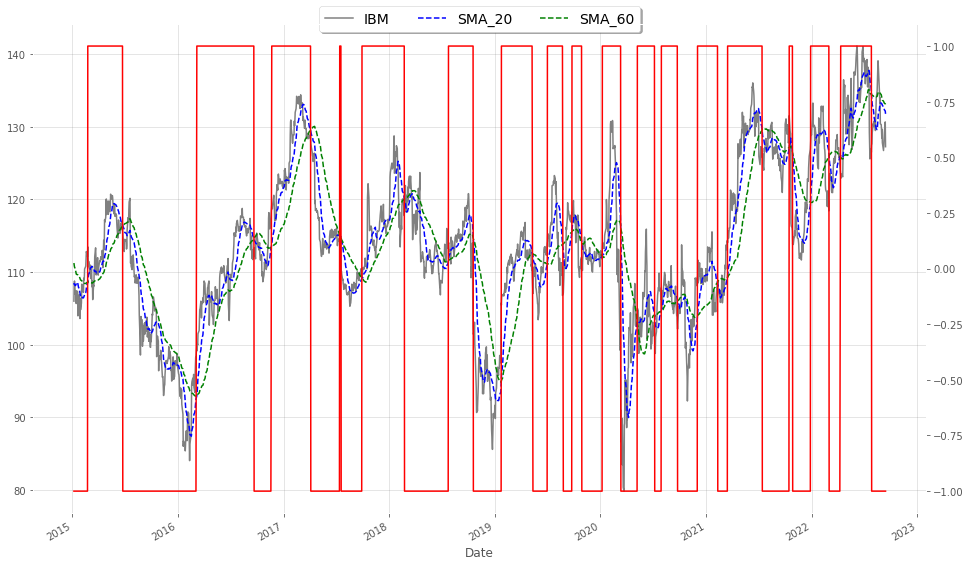

In [18]:
ax = IBM_df2[['IBM', 
                  "SMA_20", 
                  "SMA_60", 
                 "our_positions"]
                ].plot(secondary_y = "our_positions", 
                      figsize = (16, 10), 
                      style = ['grey', 
                              "b--", 
                              "g--", 
                              'red'])

ax.legend(loc = "upper center",
          bbox_to_anchor = (0.5, 1.05),
         ncol = 3, shadow = True)

#first term in box to anchor controls how left or right your legend is; 
#closer to 1 is more to the right and closer to left is more to 0; 
#anything beyond that range will cause the legend to effectively shoot out of the graph 
#ncol = 3 splits the legend column into 3 instead of lumping it into 1

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

In [19]:
IBM_df2['RETURNS'] = np.log(IBM_df2.IBM / IBM_df2.IBM.shift(1))
IBM_df2['STRATEGY'] = IBM_df2['our_positions'].shift(1) * IBM_df2['RETURNS']

In [20]:
IBM_df2["RETURNS"].cumsum().apply(np.exp)[-1]
#on 13 sep 2022, the cummlative actual IBM stock returns is ~1.2x
#that means that the holding period return is ~20% so stock has appreciated by 20%

1.2005811825416282

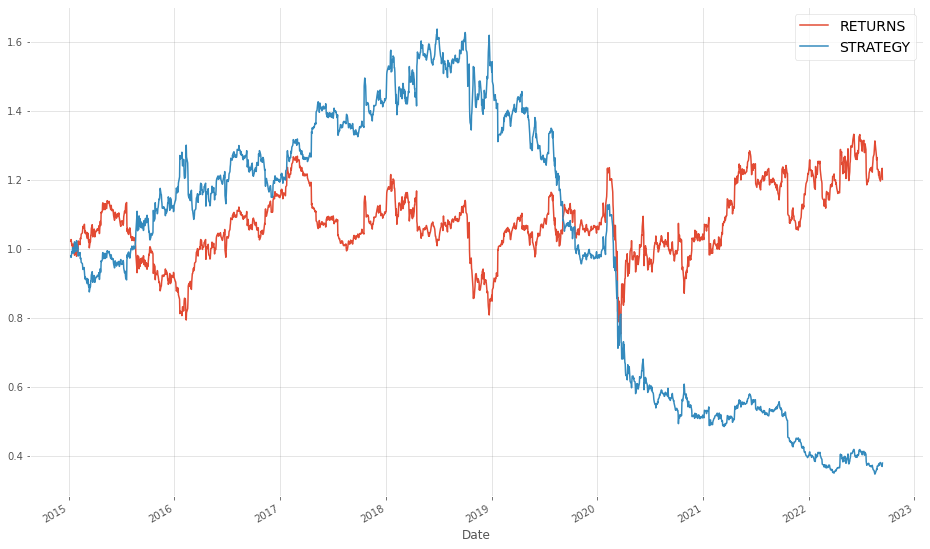

In [21]:
ax = IBM_df2[["RETURNS", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10))


### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [22]:
IBM_df2['CUMULATIVE_RETURNS'] = IBM_df2['STRATEGY'].cumsum().apply(np.exp)
IBM_df2['MAX_GROSS_PERFORMANCE'] = IBM_df2['CUMULATIVE_RETURNS'].cummax()

<AxesSubplot:xlabel='Date'>

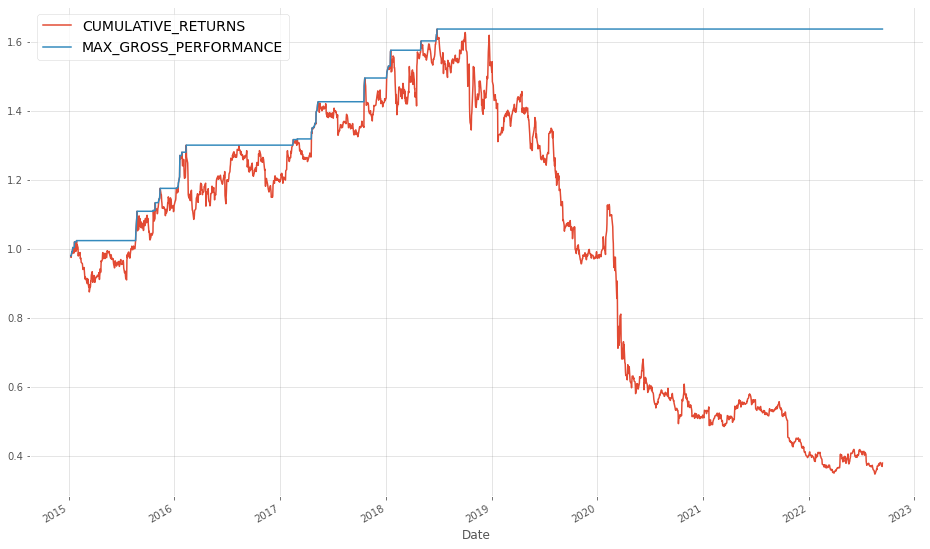

In [23]:
IBM_df2[['CUMULATIVE_RETURNS', 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

In [24]:
# maximum drawdown
drawdown = (IBM_df2['MAX_GROSS_PERFORMANCE'] - IBM_df2["CUMULATIVE_RETURNS"])/IBM_df2['MAX_GROSS_PERFORMANCE']
drawdown.max()

0.7884465400481637

In [25]:
# longest drawdown period 1
drawdown_period1 = (IBM_df2.index[-1].to_pydatetime() - drawdown[drawdown == 0].index[-1].to_pydatetime())

In [26]:
drawdown_period1.days

1539

In [27]:
# Second longest drawdown period #method 1
drawdown_period2 = (drawdown[drawdown == 0].index[1:].to_pydatetime() - 
                   drawdown[drawdown == 0].index[:-1].to_pydatetime())

In [28]:
drawdown_period2.max()

datetime.timedelta(days=369)

In [29]:
drawdown_period2.max().days

369

In [30]:
drawdown[drawdown == 0].index[1:].to_pydatetime

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2015-01-12', '2015-01-14', '2015-01-15', '2015-01-21',
               '2015-01-28', '2015-08-20', '2015-08-21', '2015-08-24',
               '2015-08-25', '2015-10-20', '2015-10-27', '2015-11-09',
               '2015-11-11', '2015-11-12', '2015-11-13', '2016-01-08',
               '2016-01-13', '2016-01-15', '2016-01-19', '2016-01-20',
               '2016-01-27', '2016-02-11', '2017-02-14', '2017-02-15',
               '2017-03-01', '2017-04-19', '2017-04-21', '2017-04-26',
               '2017-05-01', '2017-05-03', '2017-05-05', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-10-18', '2017-10-19', '2017-10-20', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-17', '2018-01-18', '2018-05-02',
               '2018-05-03', '2018-06-25', '2018-06-27'],
              dtype='datetime64[ns]', 

In [31]:
drawdown[drawdown == 0].index[1:]

DatetimeIndex(['2015-01-12', '2015-01-14', '2015-01-15', '2015-01-21',
               '2015-01-28', '2015-08-20', '2015-08-21', '2015-08-24',
               '2015-08-25', '2015-10-20', '2015-10-27', '2015-11-09',
               '2015-11-11', '2015-11-12', '2015-11-13', '2016-01-08',
               '2016-01-13', '2016-01-15', '2016-01-19', '2016-01-20',
               '2016-01-27', '2016-02-11', '2017-02-14', '2017-02-15',
               '2017-03-01', '2017-04-19', '2017-04-21', '2017-04-26',
               '2017-05-01', '2017-05-03', '2017-05-05', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-10-18', '2017-10-19', '2017-10-20', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-17', '2018-01-18', '2018-05-02',
               '2018-05-03', '2018-06-25', '2018-06-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [32]:
# Second longest drawdown period #method 2
drawdown_period3 = (drawdown[drawdown == 0].index[1:] - 
                   drawdown[drawdown == 0].index[:-1])

In [33]:
drawdown_period3.max()

Timedelta('369 days 00:00:00')

In [34]:
drawdown_period3.max().days

369

In [35]:
print("The maximum drawdown is about {} percentage points".format(np.round(drawdown.max(), 4) * 100))

The maximum drawdown is about 78.84 percentage points


### Please make sure to answer below.

    The maximum drawdown is about _____78.84______ percentage points.
    The longest drawdown period lasts for _____1539______ days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [36]:
WMT_df2 = pd.DataFrame()
WMT_df2['PRICES'] = stock_df["WMT"]
WMT_df2['RETURNS'] = np.log(WMT_df2['PRICES'] / WMT_df2['PRICES'].shift(1))
WMT_df2["SMA_41"] = WMT_df2["PRICES"].rolling(window = 41).mean()

In [37]:
# threshold value of 4
T = 4

In [38]:
WMT_df2["DIST"] = WMT_df2['PRICES'] - WMT_df2["SMA_41"]

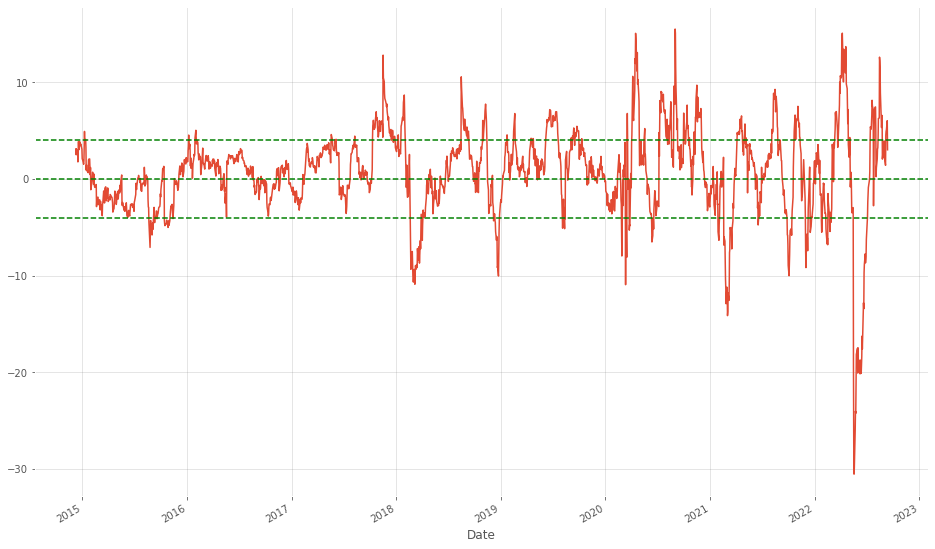

In [39]:
WMT_df2["DIST"].dropna().plot(figsize = (16, 10))

plt.axhline(T, color = 'green', ls = "--")
plt.axhline(0, color = 'green', ls = '--')
plt.axhline(-T, color = 'green', ls = '--')

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

In [40]:
WMT_df2["Position"] = np.where(WMT_df2["DIST"] > T, -1, 
                               np.nan)

In [41]:
WMT_df2["Position"] = np.where(WMT_df2["DIST"] < -T, 1, 
                              WMT_df2["Position"])

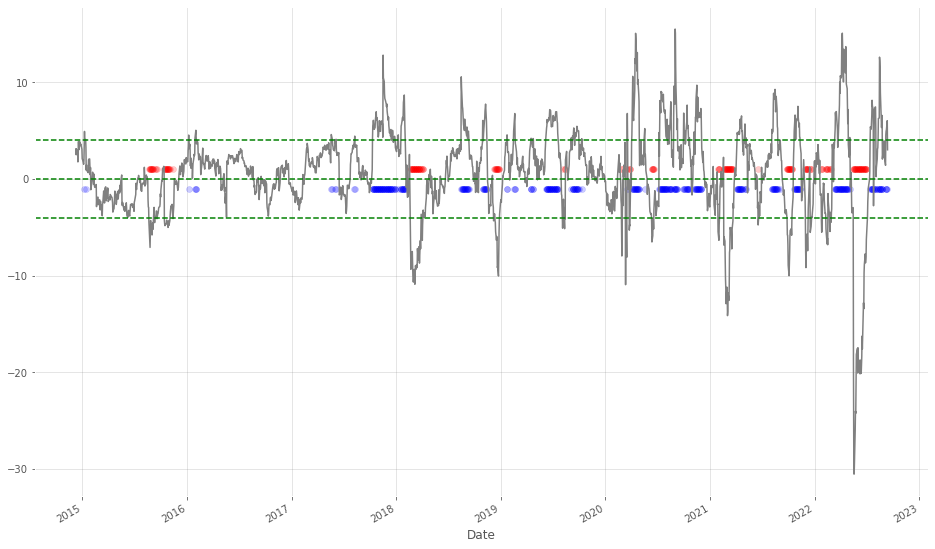

In [42]:
WMT_df2["DIST"].dropna().plot(figsize = (16, 10), color = 'grey')

plt.axhline(T, color = 'green', ls = "--")
plt.axhline(0, color = 'green', ls = '--')
plt.axhline(-T, color = 'green', ls = '--')

plt.scatter(x = WMT_df2.Position[WMT_df2.Position == 1].index, 
           y = WMT_df2.Position[WMT_df2.Position == 1], color = 'red', 
           alpha = 0.2)

plt.scatter(x = WMT_df2.Position[WMT_df2.Position == -1].index, 
           y = WMT_df2.Position[WMT_df2.Position == -1], color = 'blue', 
           alpha = 0.2)

#### Trading dots 1

In [43]:
(WMT_df2["Position"] == 1).sum() + (WMT_df2["Position"] == -1).sum()

541

In [44]:
print("Based on mean-reversion strategy, there are {} trading dots found."
      .format((WMT_df2["Position"] == 1).sum() + (WMT_df2["Position"] == -1).sum()))

Based on mean-reversion strategy, there are 541 trading dots found.


#### Trading dots 2

In [45]:
WMT_df2['Position'] = np.where(WMT_df2["DIST"]* WMT_df2["DIST"].shift(1) < 0, # price crossover SMA
                              0, WMT_df2["Position"])

In [46]:
(WMT_df2["Position"] == 1).sum() + (WMT_df2["Position"] == -1).sum()

537

In [47]:
WMT_df2['Position'] = WMT_df2["Position"].ffill().fillna(0) 

#### Trading opportunities

In [48]:
len(WMT_df2[WMT_df2['Position']!=WMT_df2['Position'].shift(1)]['Position'])

78

because open the psoition and close the position mean a trading that we can get 
but But the reverse is not true.So length/2=39

In [49]:
len(WMT_df2[WMT_df2['Position']!=WMT_df2['Position'].shift(1)]['Position'])/2

39.0

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were ___39____ trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

In [50]:
WMT_df2['RETURNS'] = np.log(stock_df['WMT'] / stock_df['WMT'].shift(1))
WMT_df2["STRATEGY"] = WMT_df2['Position'].shift(1) * WMT_df2["RETURNS"]

<AxesSubplot:xlabel='Date'>

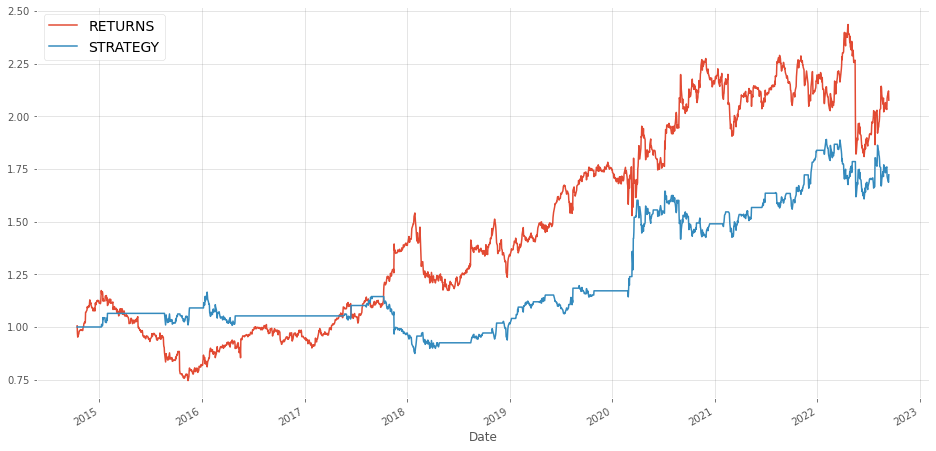

In [51]:
WMT_df2[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 8))

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of ____-0.5117_____ . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of _____0.4325____ .

In [52]:
IBM_return = IBM_df2['STRATEGY']
IBM_sharpe = np.sqrt(253) * (IBM_return.mean() / IBM_return.std())
IBM_sharpe
# Sharpe ratio base on log return for IBM

-0.5116558554194742

In [53]:
WMT_return = WMT_df2["STRATEGY"]
WMT_sharpe = np.sqrt(253) * (WMT_return.mean() / WMT_return.std())
WMT_sharpe
 # Sharpe ratio base on log return for WMT

0.4324824411775613

In [54]:
print("Simple moving strategy for IBM leads to Sharpe ratio of {}."\
     .format(np.round(IBM_sharpe, 4)))

Simple moving strategy for IBM leads to Sharpe ratio of -0.5117.


In [55]:
print("Mean reversion strategy for WMT leads to Sharpe ratio of {}."\
     .format(np.round(WMT_sharpe, 4)))

Mean reversion strategy for WMT leads to Sharpe ratio of 0.4325.


### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of ____-0.1188_____ . 

    Mean reversion strategy for WMT leads to a CAGR of ____0.07103_____ .


In [56]:
IBM_day = (IBM_df2.index[-1] - IBM_df2.index[0]).days
((np.exp(IBM_df2.STRATEGY.sum()))** (1 / (IBM_day /365))) - 1
#method 1 of IBM

-0.118767485671737

In [57]:
Cumulative_Strategy_Returns = IBM_df2.STRATEGY.cumsum().apply(np.exp)
CAGR_IBM = ((Cumulative_Strategy_Returns)[-1]**(365/IBM_day))-1
CAGR_IBM
#method 2 of IBM

-0.11876748567173712

In [58]:
WMT_day = (WMT_df2.index[-1] - WMT_df2.index[0]).days
((np.exp(WMT_df2.STRATEGY.sum()))** (1 / (WMT_day / 365))) - 1
# method 1 of WMT

0.07102626168287207

In [59]:
Cumulative_Strategy_Returns = WMT_df2.STRATEGY.cumsum().apply(np.exp)
CAGR_WMT = ((Cumulative_Strategy_Returns)[-1]**(365 / WMT_day))-1
CAGR_WMT
# method 2 of WMT

0.07102626168287207

In [60]:
print("Simple moving strategy for IBM leads to a CAGR of {}"\
     .format(round(CAGR_IBM, 4)))

Simple moving strategy for IBM leads to a CAGR of -0.1188


In [61]:
print("Mean reversion strategy for MKT leads to a CAGR of {}"\
      .format(round(CAGR_WMT, 5)))

Mean reversion strategy for MKT leads to a CAGR of 0.07103


\### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>